<div class="alert alert-danger" role="alert">
<h1>Artificial Neural Network (ANN)</h1>
<ul>
<li><ol  start='1'>
<li>Import Libraries</li>

</ol>
</li>
<li><ol start='2' >
<li>Prepare Dataset</li>

</ol>
</li>
<li><ol start='3' >
<li>Create ANN Model</li>

</ol>
</li>
<li><ol start='4' >
<li>Instantiate Model Class</li>
 
</ol>
</li>
<li><ol start='5' >
<li>Instantiate Loss</li>
    
</ol>
</li>
<li><ol start='6' >
<li>Instantiate Optimizer</li>

</ol>
</li>
<li><ol start='7' >
<li>Traning the Model</li>
    
</ol>
</li>
<li><ol start='8' >
<li>Prediction</li>
    
</ol>
</li>
   
</ul>
</div>

In [10]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [6]:
# prepare dataset
# load data
train = pd.read_csv(r"datasets\digit-recognizer\train.csv", dtype=np.float32)

# split datainfo features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size=0.2,
                                                                             random_state=42)

# create feature and targets tensor for train set. 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [7]:
# create ann model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # non linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # non linearity 2
        self.tanh2 = nn.Tanh()
        
        # linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # non linearity 3
        self.elu3 = nn.ELU()
        
        # linear function 4(readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non linearity 2
        out = self.tanh2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non linearity 3
        out = self.elu3(out)
        
        # linear function 4
        out = self.fc4(out)
        return out
    
    
    
# instantiate ANN
input_dim = 28*28
hidden_dim = 150
output_dim = 10

# create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward propagation
        outputs = model(train)
        
        # calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # calculating gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(-1, 28*28))
                
                # forward propagation
                outputs = model(test)
                
                # get predictions from the maxiumum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            
            # print loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7621433138847351  Accuracy: 79.08333587646484 %
Iteration: 1000  Loss: 0.45105987787246704  Accuracy: 87.72618865966797 %
Iteration: 1500  Loss: 0.22396725416183472  Accuracy: 89.71428680419922 %
Iteration: 2000  Loss: 0.3010711073875427  Accuracy: 90.5952377319336 %
Iteration: 2500  Loss: 0.30994200706481934  Accuracy: 91.86904907226562 %
Iteration: 3000  Loss: 0.12272922694683075  Accuracy: 92.58333587646484 %
Iteration: 3500  Loss: 0.246826633810997  Accuracy: 93.41666412353516 %
Iteration: 4000  Loss: 0.062406763434410095  Accuracy: 93.78571319580078 %
Iteration: 4500  Loss: 0.31196266412734985  Accuracy: 94.42857360839844 %
Iteration: 5000  Loss: 0.0956588163971901  Accuracy: 94.71428680419922 %
Iteration: 5500  Loss: 0.20848681032657623  Accuracy: 94.94047546386719 %
Iteration: 6000  Loss: 0.19172225892543793  Accuracy: 95.03571319580078 %
Iteration: 6500  Loss: 0.09384050220251083  Accuracy: 95.4047622680664 %
Iteration: 7000  Loss: 0.10891516506671906  A

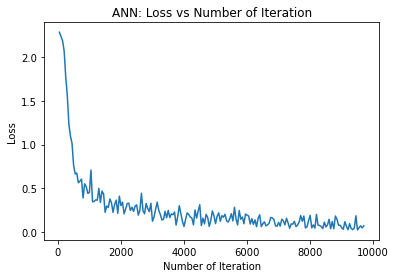

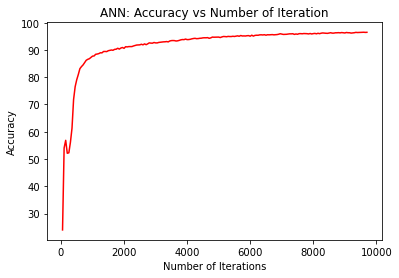

In [12]:
# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of Iteration")
plt.show()


# visualization accuracy
plt.plot(iteration_list, accuracy_list, color="red")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of Iteration")
plt.show()